# MNISTを学習する

In [1]:
import keras
import numpy as np

from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [3]:
# MNISTデータのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 画像を1次元配列化
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot-encoding
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam

# モデルの組み立て
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

# モデルをコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [5]:
# Early-stopping
# early_stopping = keras.callbacks.EarlyStopping(patience=0, verbose=1)

# モデルの訓練
history = model.fit(X_train, Y_train,
                    batch_size=128,
                    nb_epoch=20,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[])

/home/smurakami/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 71us/step - loss: 0.3963 - acc: 0.8813 - val_loss: 0.1111 - val_acc: 0.9705
Epoch 2/20
54000/54000 [==============================] - 3s 57us/step - loss: 0.1501 - acc: 0.9577 - val_loss: 0.0794 - val_acc: 0.9765
Epoch 3/20
54000/54000 [==============================] - 3s 57us/step - loss: 0.1104 - acc: 0.9690 - val_loss: 0.0848 - val_acc: 0.9748
Epoch 4/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.0896 - acc: 0.9736 - val_loss: 0.0768 - val_acc: 0.9782
Epoch 5/20
54000/54000 [==============================] - 3s 57us/step - loss: 0.0750 - acc: 0.9791 - val_loss: 0.0665 - val_acc: 0.9830
Epoch 6/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.0627 - acc: 0.9814 - val_loss: 0.0742 - val_acc: 0.9802
Epoch 7/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.0573 - acc: 0.9828 - val_loss: 0.0773 - val_acc:

In [58]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 280px; height: 280px;">
<canvas width="140" height="140", style="border: solid 2px #666; width: 280px; height: 280px;"></canvas>
</td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
<button onclick="set_value()">Save</button>

</td>
</table>
"""

javascript="""
<script type="text/Javascript">
	var pixels = [];
	for(var i = 0; i < 28*28; i++) pixels[i] = 0
	var click=0;
	var button_state=0;
    
    var width = 140;
    var height = 140;
    
	var canvas = document.querySelector("canvas");
    var prev = null;
    
    canvas.addEventListener("mousedown", function(e){
        button_state=1;
        prev = {x: e.offsetX/2, y: e.offsetY/2};
    });
    canvas.addEventListener("mouseup", function(e){
        button_state=0;
//        set_value();
    });
    canvas.addEventListener("mouseleave", function(e){
        button_state=0;
    });
	
	canvas.addEventListener("mousemove", function(e){
        if(button_state){
            var pos = {x: e.offsetX/2, y: e.offsetY/2};;
            click = 1;
            canvas.getContext("2d").beginPath()
            canvas.getContext("2d").lineCap = "round";
			canvas.getContext("2d").lineWidth = 16;
			canvas.getContext("2d").strokeStyle = 'rgba(0, 0, 0, 1)';
			canvas.getContext("2d").moveTo(prev.x, prev.y);
			canvas.getContext("2d").lineTo(pos.x, pos.y);
			canvas.getContext("2d").stroke();
//            canvas.getContext("2d").endPath()
            prev = pos;
            
		}else{
//            if(click == 1) set_value()
			click = 0;
		}
	});
    
    function callback(out_type, out_data){
        // do_something
        console.log(out_data);
    }
	
	function set_value(){
        var pix = canvas.getContext("2d").getImageData(0, 0, width, height).data;
		var result = "";
		for(var i=0;i<pix.length;i++) result += pix[i] + ",";
		var kernel = IPython.notebook.kernel;
		kernel.execute("image = [" + result + "]");
		kernel.execute("image = np.array(image)");
		kernel.execute("image = image.reshape(" + height + ", " + width + ", 4)");
		kernel.execute("image = image[:, :, 0:3].sum(axis=2)/3");
		kernel.execute("image = scipy.misc.imresize(image, (28, 28))");       
		kernel.execute("image = 1 - (image / 255.0)");       
        kernel.execute("np.argmax(model.predict(image.reshape(-1, 784)))", {"output": callback});
	}
	
	function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
		canvas.getContext("2d").fillRect(0,0, width,height);
		for(var i=0;i<28*28;i++) pixels[i]=0
	}
    
    clear_value()
</script>
"""

from IPython.display import HTML
HTML(input_form + javascript)

In [61]:
np.argmax(model.predict(image.reshape(-1, 784)))

7

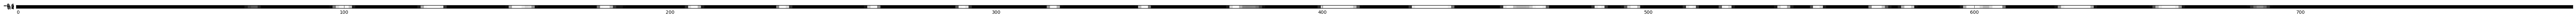

In [49]:
plt.figure(figsize=(100, 1))
plt.imshow(image.reshape(1, -1), cmap='gray', interpolation='nearest')